# ROC curve

## 1. TPR and FPR

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target.copy()

# 将数据进行转换，为使数据发生偏斜
y[digits.target == 9] = 1
y[digits.target != 9] = 0

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

# 决策函数--获得决策之前的分数值
decision_scores = log_reg.decision_function(x_test)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==0))

def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==1))

def TPR(y_true, y_predict):
    try:
        return TP(y_true, y_predict) / (TP(y_true, y_predict) + FN(y_true, y_predict))
    except:
        return 0.

def FPR(y_true, y_predict):
    try:
        return FP(y_true, y_predict) / (TN(y_true, y_predict) + FP(y_true, y_predict))
    except:
        return 0.

In [5]:
TPR_stg = []
FPR_stg = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [6]:
for i in thresholds:
    y_predict_temp = np.array(decision_scores>=i, dtype=int)
    TPR_stg.append(TPR(y_test, y_predict_temp))
    FPR_stg.append(FPR(y_test, y_predict_temp))

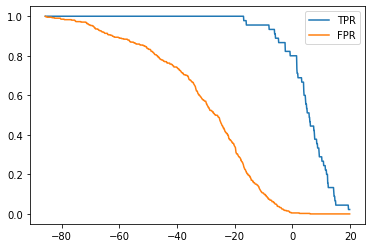

In [7]:
plt.plot(thresholds, TPR_stg, label="TPR")
plt.plot(thresholds, FPR_stg, label="FPR")
plt.legend()
plt.show()

## ROC curve

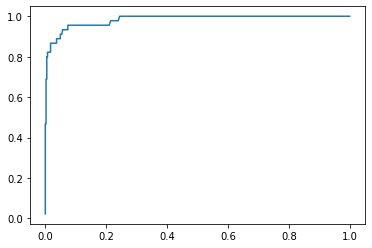

In [8]:
plt.plot(FPR_stg, TPR_stg)
plt.show()

## sklearn 中的 ROC curve

In [10]:
from sklearn.metrics import roc_curve

fprs, tprs, threshold = roc_curve(y_test, decision_scores)

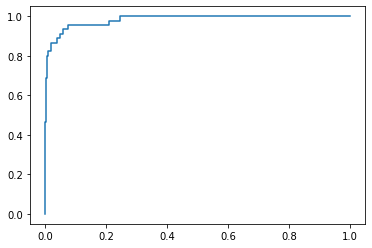

In [11]:
plt.plot(fprs, tprs)
plt.show()

## ROC curve 的面积

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119